In [1]:
# installing snowflake connector
!pip install snowflake-connector-python
!pip install "snowflake-connector-python[pandas]"
!pip install "snowflake-connector-python[secure-local-storage,pandas]"

     |████████████████████████████████| 16.5 MB 173 kB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 192 kB 55.7 MB/s 
     |████████████████████████████████| 104 kB 55.2 MB/s 
     |████████████████████████████████| 2.0 MB 49.4 MB/s 
     |████████████████████████████████| 3.6 MB 45.9 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 


In [2]:
import snowflake.connector

In [3]:
# Gets the version
ctx = snowflake.connector.connect(
    user='kipimini',
    password='Kipi@100',
    account='lo95007.ap-south-1.aws',
    warehouse="compute_wh",
    database="development",
    schema="operation",
    )
cs = ctx.cursor()

# Execute a statement that will generate a result set.
sql = "select * from SECURE_CASE_DATASCIENCE where ACTIVE is not null"
cs.execute(sql)

# Fetch the result set from the cursor and deliver it as the Pandas DataFrame.
df = cs.fetch_pandas_all()

In [4]:
sql1 = "select * from SECURE_CASE_DATASCIENCE where ACTIVE is not null and PARDOT_SCORE is NOT NULL AND LEAD_SCORE is NOT NULL"
cs.execute(sql1)

# Fetch the result set from the cursor and deliver it as the Pandas DataFrame.
df_valid_lead = cs.fetch_pandas_all()
df_valid_lead.head()


,ACCOUNT_ID,ACCOUNT_NAME,ACCOUNT_RATING,ACCOUNT_TYPE,APPLICATION,BILLING_COUNTRY,DEPARTMENT,DIVISION,INDUSTRY,IS_ACTIVE,LEAD_SOURCE,LEAD_TYPE,PRIMARY_APPLICATION,PRODUCT_CATEGORY,STATUS,ACTIVE,PARDOT_SCORE,LEAD_SCORE
0,2055572228be6RvPWG,"Renner, Kohler and Botsford",2,Prospect,Metabolomics,Bulgaria,None,None,Healthcare,FALSE,Website,None,Metabolomics,Training,Closed,TRUE,54,87
1,5976684606ji7IvAYK,Hamill-Senger,3,Customer,Biotherapeutics,Philippines,None,None,Safety & Security,TRUE,Website,None,Amino Acids & Metobolites,Training,Open,FALSE,22,44
2,0706873771qr4NlYMH,"Lockman, Lang and Toy",2,Customer,Intact Proteins & Antibodies,Uganda,BioAnalytics,Admin,Safety & Security,FALSE,Website,Potential Customer,Peptide Mapping,Consumables,Solved,FALSE,81,178
3,3554878426hk3LzLIK,"Hilll, Bogisich and Hermann",1,Customer,Metabolomics,United States,Protein Expression & Modification Division,Education,Life Sciences,TRUE,Referral,Influencer,Peptide Mapping,Training,Open,TRUE,32,67
4,0222750725fi2TtISL,Harris-Jacobs,2,Prospect,Metabolomics,Iran,None,None,Healthcare,TRUE,Field Sales,Bus Dev,Intact Proteins & Antibodies,Consumables,Open,TRUE,31,21


In [5]:
df.head()

,ACCOUNT_ID,ACCOUNT_NAME,ACCOUNT_RATING,ACCOUNT_TYPE,APPLICATION,BILLING_COUNTRY,DEPARTMENT,DIVISION,INDUSTRY,IS_ACTIVE,LEAD_SOURCE,LEAD_TYPE,PRIMARY_APPLICATION,PRODUCT_CATEGORY,STATUS,ACTIVE,PARDOT_SCORE,LEAD_SCORE
0,2859846192vs2NcTAR,Greenfelder Group,2,Customer,Amino Acids & Metobolites,China,None,None,Life Sciences,FALSE,Field Sales,None,Biotherapeutics,System,Solved,FALSE,5,None
1,2979252564vd0CvUHN,Fay Inc,1,Prospect,Amino Acids & Metobolites,Ukraine,Department of Computational Biology,Education,Life Sciences,TRUE,Field Sales,Influencer,Metabolomics,System,Open,TRUE,None,None
2,3886999386al0PoLLE,"Balistreri, Reichel and Johns",3,Prospect,Amino Acids & Metobolites,China,Department of Computational Biology,Education,Life Sciences,FALSE,Field Sales,Potential Customer,Metabolomics,Consumables,Open,FALSE,None,None
3,5021524997td6JbVUI,"Fadel, Koepp and Kautzer",3,Customer,Metabolomics,Mexico,BioAnalytics,Education,Life Sciences,TRUE,Trade Show,Influencer,Metabolomics,Training,Open,FALSE,None,None
4,1445791831bt9CkPDK,"Pouros, Zboncak and Upton",3,Customer,Cell Lysates,China,BioAnalytics,Education,Safety & Security,FALSE,Website,None,Peptide Mapping,System,Closed,TRUE,None,None


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 0 to 48456
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ACCOUNT_ID           400000 non-null  object
 1   ACCOUNT_NAME         400000 non-null  object
 2   ACCOUNT_RATING       400000 non-null  object
 3   ACCOUNT_TYPE         400000 non-null  object
 4   APPLICATION          400000 non-null  object
 5   BILLING_COUNTRY      400000 non-null  object
 6   DEPARTMENT           118963 non-null  object
 7   DIVISION             118963 non-null  object
 8   INDUSTRY             400000 non-null  object
 9   IS_ACTIVE            400000 non-null  object
 10  LEAD_SOURCE          400000 non-null  object
 11  LEAD_TYPE            277024 non-null  object
 12  PRIMARY_APPLICATION  400000 non-null  object
 13  PRODUCT_CATEGORY     400000 non-null  object
 14  STATUS               400000 non-null  object
 15  ACTIVE               400000 non-nul

In [7]:
df.isna().sum()

ACCOUNT_ID                  0
ACCOUNT_NAME                0
ACCOUNT_RATING              0
ACCOUNT_TYPE                0
APPLICATION                 0
BILLING_COUNTRY             0
DEPARTMENT             281037
DIVISION               281037
INDUSTRY                    0
IS_ACTIVE                   0
LEAD_SOURCE                 0
LEAD_TYPE              122976
PRIMARY_APPLICATION         0
PRODUCT_CATEGORY            0
STATUS                      0
ACTIVE                      0
PARDOT_SCORE           340792
LEAD_SCORE             301079
dtype: int64

In [8]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 2.7 MB/s 


In [9]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
import sweetviz
my_report  = sweetviz.analyze([df,'Total Data'], target_feat='ACTIVE')
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
df.columns

Index(['ACCOUNT_ID', 'ACCOUNT_NAME', 'ACCOUNT_RATING', 'ACCOUNT_TYPE',
       'APPLICATION', 'BILLING_COUNTRY', 'DEPARTMENT', 'DIVISION', 'INDUSTRY',
       'IS_ACTIVE', 'LEAD_SOURCE', 'LEAD_TYPE', 'PRIMARY_APPLICATION',
       'PRODUCT_CATEGORY', 'STATUS', 'ACTIVE', 'PARDOT_SCORE', 'LEAD_SCORE'],
      dtype='object')

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df['ACCOUNT_RATING'].describe()

count     400000
unique         3
top            1
freq      133627
Name: ACCOUNT_RATING, dtype: object

In [14]:
def frequency_plot(col_name,data):
  plt.figure(figsize=(8,4))
  ax = sns.countplot(x=col_name, data=data)
  plt.title('Distribution of '+col_name)
  plt.xlabel(col_name)
  plt.ylabel('Frequency')
  plt.show()


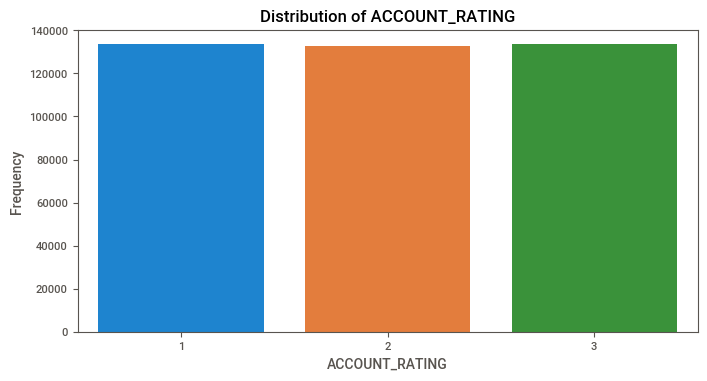

In [15]:
frequency_plot("ACCOUNT_RATING",df)

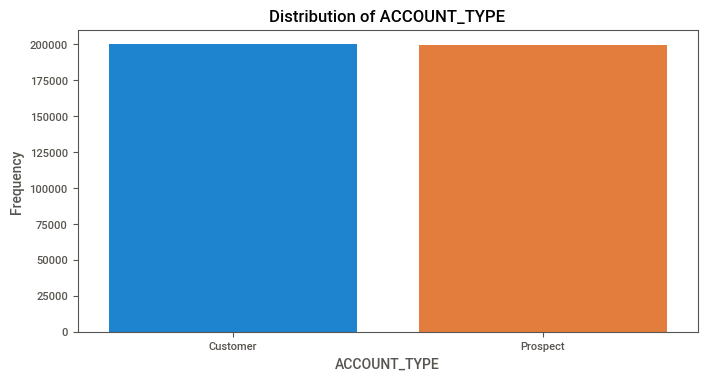

In [16]:
frequency_plot("ACCOUNT_TYPE",df)

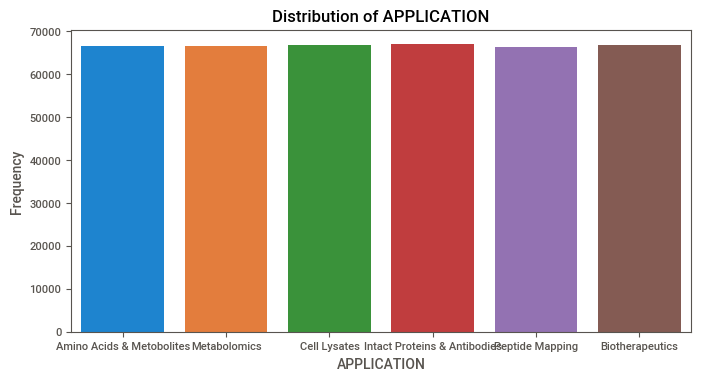

In [17]:
frequency_plot("APPLICATION",df)

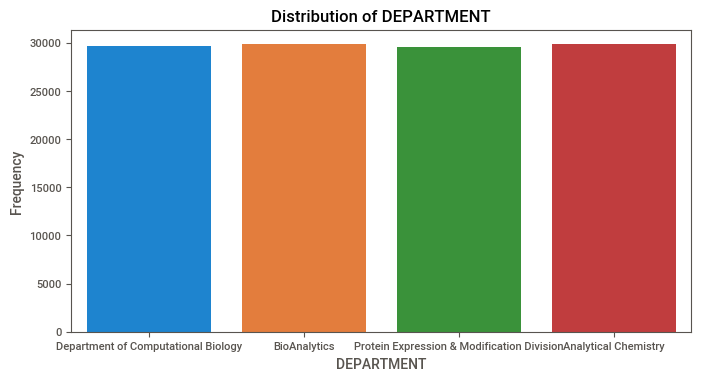

In [18]:
frequency_plot("DEPARTMENT",df)

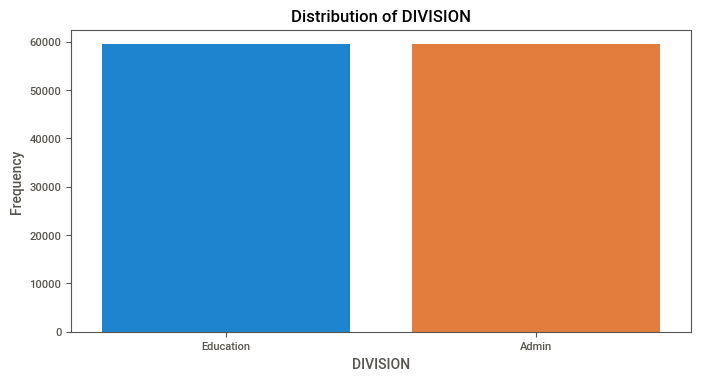

In [19]:
frequency_plot("DIVISION",df)

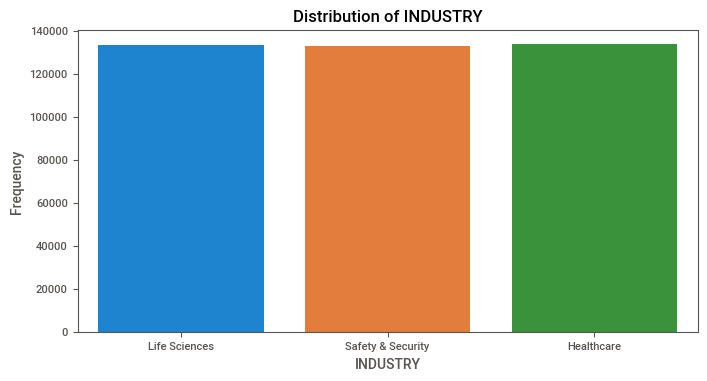

In [20]:
frequency_plot("INDUSTRY",df)

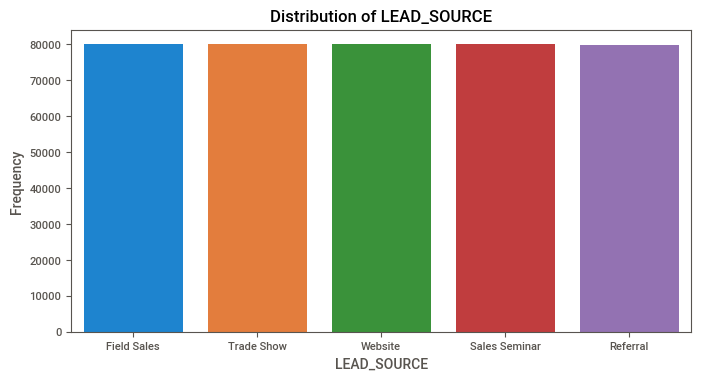

In [21]:
frequency_plot("LEAD_SOURCE",df)

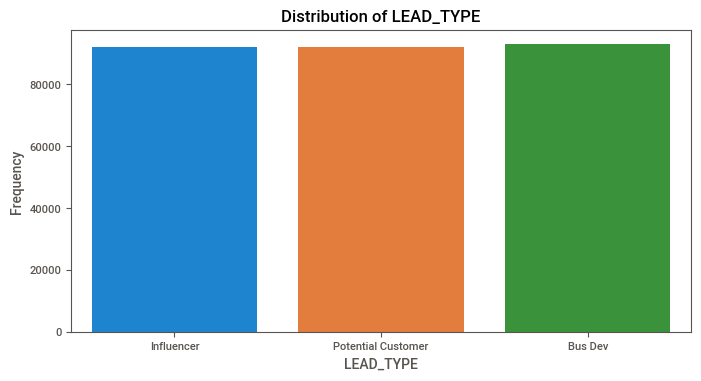

In [22]:
frequency_plot("LEAD_TYPE",df)

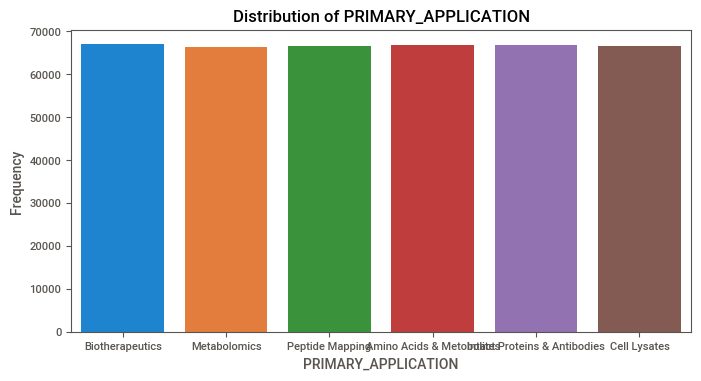

In [23]:
frequency_plot("PRIMARY_APPLICATION",df)

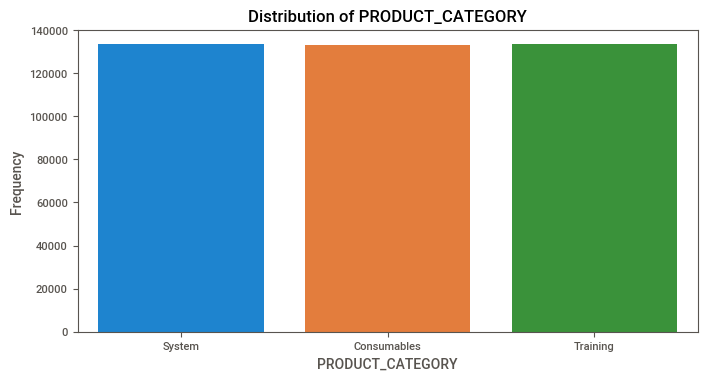

In [24]:
frequency_plot("PRODUCT_CATEGORY",df)

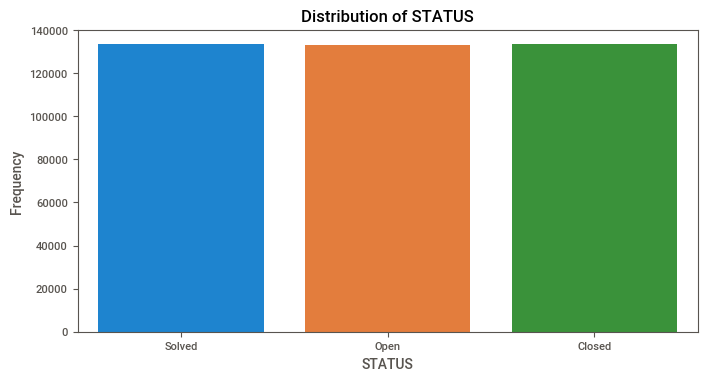

In [25]:
frequency_plot("STATUS",df)

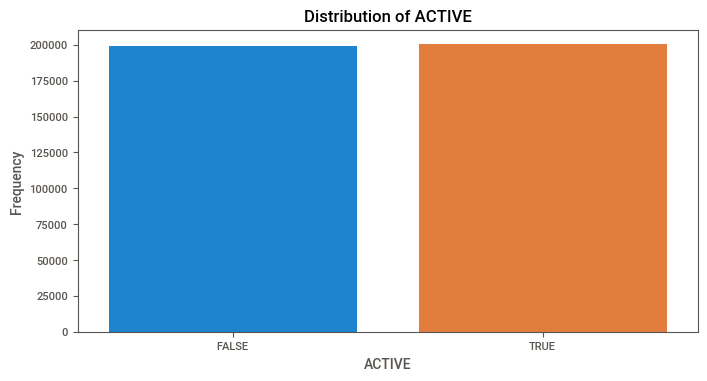

In [26]:
frequency_plot("ACTIVE",df)

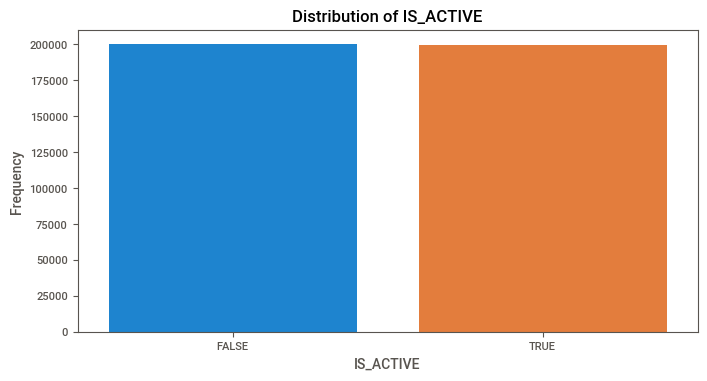

In [27]:
frequency_plot("IS_ACTIVE",df)

#Some facet

In [28]:
def frequency_plot_active(col_name,data,facet_col):
  plt.figure(figsize=(8,4))
  ax = sns.countplot(x=col_name, data=data,hue=facet_col)
  plt.title('Distribution of '+col_name)
  plt.xlabel(col_name)
  plt.ylabel('Frequency')
  plt.show()


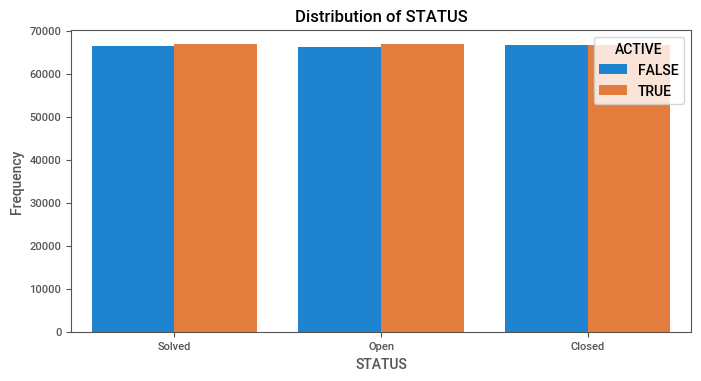

In [29]:
frequency_plot_active("STATUS",df,"ACTIVE")

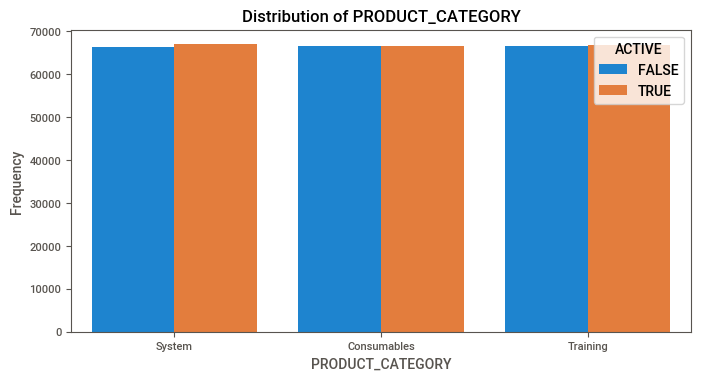

In [30]:
frequency_plot_active("PRODUCT_CATEGORY",df,"ACTIVE")

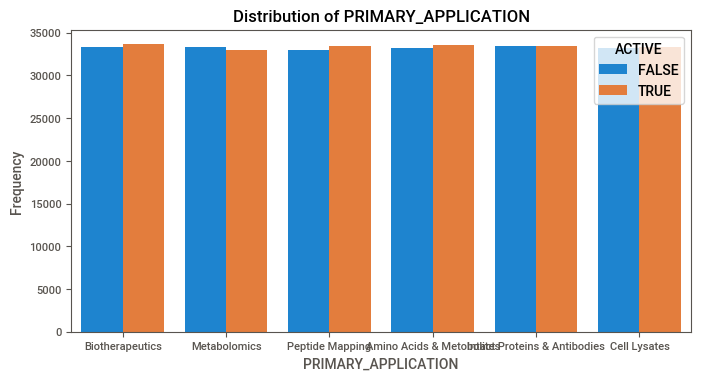

In [31]:
frequency_plot_active("PRIMARY_APPLICATION",df,"ACTIVE")

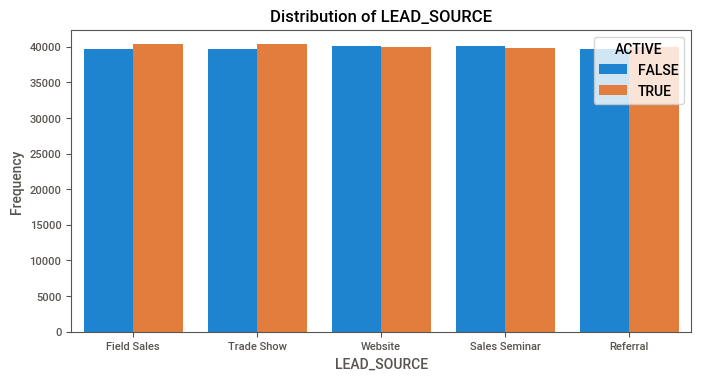

In [32]:
frequency_plot_active("LEAD_SOURCE",df,"ACTIVE")

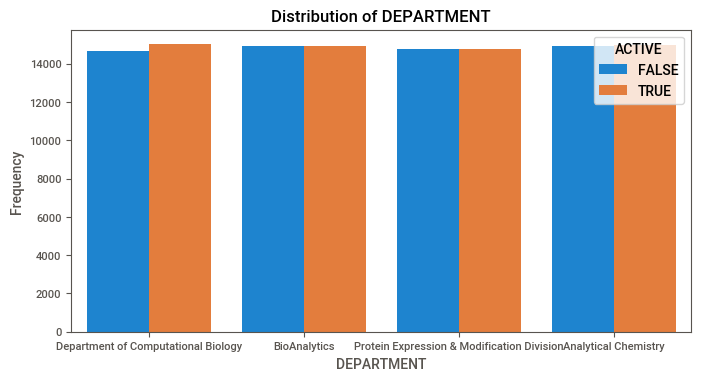

In [33]:
frequency_plot_active("DEPARTMENT",df,"ACTIVE")

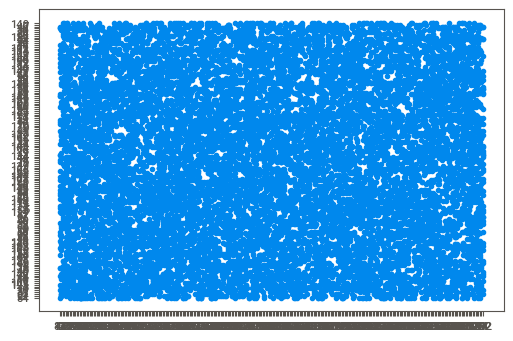

In [36]:
plt.scatter("LEAD_SCORE", "PARDOT_SCORE",data=df_valid_lead)

## Model Building

In [37]:
COLUMNS = ["STATUS","DEPARTMENT","ACCOUNT_RATING","BILLING_COUNTRY","INDUSTRY","APPLICATION","LEAD_TYPE","PARDOT_SCORE","LEAD_SCORE","ACTIVE"]

In [72]:
working_df = df_valid_lead[COLUMNS]
working_df.head()

,STATUS,DEPARTMENT,ACCOUNT_RATING,BILLING_COUNTRY,INDUSTRY,APPLICATION,LEAD_TYPE,PARDOT_SCORE,LEAD_SCORE,ACTIVE
0,Closed,None,2,Bulgaria,Healthcare,Metabolomics,None,54,87,TRUE
1,Open,None,3,Philippines,Safety & Security,Biotherapeutics,None,22,44,FALSE
2,Solved,BioAnalytics,2,Uganda,Safety & Security,Intact Proteins & Antibodies,Potential Customer,81,178,FALSE
3,Open,Protein Expression & Modification Division,1,United States,Life Sciences,Metabolomics,Influencer,32,67,TRUE
4,Open,None,2,Iran,Healthcare,Metabolomics,Bus Dev,31,21,TRUE


In [73]:
working_df["STATUS"] = working_df["STATUS"].apply(lambda x: 1 if x=="Open" else 0 )
working_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATUS,DEPARTMENT,ACCOUNT_RATING,BILLING_COUNTRY,INDUSTRY,APPLICATION,LEAD_TYPE,PARDOT_SCORE,LEAD_SCORE,ACTIVE
0,0,None,2,Bulgaria,Healthcare,Metabolomics,None,54,87,TRUE
1,1,None,3,Philippines,Safety & Security,Biotherapeutics,None,22,44,FALSE
2,0,BioAnalytics,2,Uganda,Safety & Security,Intact Proteins & Antibodies,Potential Customer,81,178,FALSE
3,1,Protein Expression & Modification Division,1,United States,Life Sciences,Metabolomics,Influencer,32,67,TRUE
4,1,None,2,Iran,Healthcare,Metabolomics,Bus Dev,31,21,TRUE


In [74]:
def billing_country_converter(df):
  if(df["BILLING_COUNTRY"]=="China"):
    return 1
  elif(df["BILLING_COUNTRY"]=="Indonesia"):
    return 2
  elif(df["BILLING_COUNTRY"]=="Russia"):
    return 3
  else:
    return 4

In [75]:
working_df['BILLING_COUNTRY'] = working_df.apply(billing_country_converter, axis = 1)
working_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATUS,DEPARTMENT,ACCOUNT_RATING,BILLING_COUNTRY,INDUSTRY,APPLICATION,LEAD_TYPE,PARDOT_SCORE,LEAD_SCORE,ACTIVE
0,0,None,2,4,Healthcare,Metabolomics,None,54,87,TRUE
1,1,None,3,4,Safety & Security,Biotherapeutics,None,22,44,FALSE
2,0,BioAnalytics,2,4,Safety & Security,Intact Proteins & Antibodies,Potential Customer,81,178,FALSE
3,1,Protein Expression & Modification Division,1,4,Life Sciences,Metabolomics,Influencer,32,67,TRUE
4,1,None,2,4,Healthcare,Metabolomics,Bus Dev,31,21,TRUE


In [76]:
working_df.drop("PARDOT_SCORE",inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
working_df.drop("LEAD_SCORE",inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
working_df.head()

,STATUS,DEPARTMENT,ACCOUNT_RATING,BILLING_COUNTRY,INDUSTRY,APPLICATION,LEAD_TYPE,ACTIVE
0,0,None,2,4,Healthcare,Metabolomics,None,TRUE
1,1,None,3,4,Safety & Security,Biotherapeutics,None,FALSE
2,0,BioAnalytics,2,4,Safety & Security,Intact Proteins & Antibodies,Potential Customer,FALSE
3,1,Protein Expression & Modification Division,1,4,Life Sciences,Metabolomics,Influencer,TRUE
4,1,None,2,4,Healthcare,Metabolomics,Bus Dev,TRUE


In [79]:
working_df["ACTIVE"] = working_df["ACTIVE"].apply(lambda x: 1 if x=="TRUE" else 0 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
working_df['ACCOUNT_RATING'] = working_df['ACCOUNT_RATING'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
working_df = pd.get_dummies(working_df)

In [82]:
working_df.head()

,STATUS,ACCOUNT_RATING,BILLING_COUNTRY,ACTIVE,DEPARTMENT_Analytical Chemistry,DEPARTMENT_BioAnalytics,DEPARTMENT_Department of Computational Biology,DEPARTMENT_Protein Expression & Modification Division,INDUSTRY_Healthcare,INDUSTRY_Life Sciences,INDUSTRY_Safety & Security,APPLICATION_Amino Acids & Metobolites,APPLICATION_Biotherapeutics,APPLICATION_Cell Lysates,APPLICATION_Intact Proteins & Antibodies,APPLICATION_Metabolomics,APPLICATION_Peptide Mapping,LEAD_TYPE_Bus Dev,LEAD_TYPE_Influencer,LEAD_TYPE_Potential Customer
0,0,2,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,3,4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,4,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
4,1,2,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [83]:
y = working_df[["ACTIVE"]]
X = working_df.drop("ACTIVE",axis=1)

In [90]:
X.head()

,STATUS,ACCOUNT_RATING,BILLING_COUNTRY,DEPARTMENT_Analytical Chemistry,DEPARTMENT_BioAnalytics,DEPARTMENT_Department of Computational Biology,DEPARTMENT_Protein Expression & Modification Division,INDUSTRY_Healthcare,INDUSTRY_Life Sciences,INDUSTRY_Safety & Security,APPLICATION_Amino Acids & Metobolites,APPLICATION_Biotherapeutics,APPLICATION_Cell Lysates,APPLICATION_Intact Proteins & Antibodies,APPLICATION_Metabolomics,APPLICATION_Peptide Mapping,LEAD_TYPE_Bus Dev,LEAD_TYPE_Influencer,LEAD_TYPE_Potential Customer
0,0,2,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,3,4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,2,4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
4,1,2,4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [84]:
y.describe()

,ACTIVE
count,14460.000000
mean,0.502075
std,0.500013
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [85]:
# Sperate train and test data
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [86]:
X.shape,y.shape

((14460, 19), (14460, 1))

In [88]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 0, 1, 1])

In [89]:
import joblib

joblib.dump(logisticRegr, "clf.pkl")

['clf.pkl']